In [1]:
import seaborn as sns
import json
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Angle between two vectors in degrees.
def vang(a, b): 
    return np.arccos(a.dot(b)) / np.pi * 180

# Vector from two angles
def vec(x):
    return np.array([np.cos(x[0]) * np.sin(x[1]), np.sin(x[0]) * np.sin(x[1]), np.cos(x[1])])

# convert in-game angles to radian coordiantes
def gamea(a, b):
    return [b / 180 * np.pi, (90 - a) / 180 * np.pi]

# pixels distance between two vectors (a,b) and (c,d) defined by in-game angles.
def points(a, b, c, d):
    return vang(vec(gamea(a, b)), vec(gamea(c, d))) / 0.022

def vector_length(x, y):
    return np.sqrt(x * x + y * y)

def diff(a, b):
#     return sum([abs(x[0] - x[1]) for x in zip(a, b)])
#     return pow(sum(d), 0.5)
    d = [pow(x[0] - x[1], 2) for x in zip(a, b)]
    return sum([max(x - 3, 0) for x in d])

def dist_score(x):
    return np.exp(-0.0004 * np.power(x, 2))

def rc_score(r1, r2):
    return 100 * np.mean([dist_score(vector_length(r1['x'][i] - r2['x'][i], r1['y'][i] - r2['y'][i])) for i in range(len(r1['x']))])

def mean_recoil(rc):
    mx = [0]
    my = [0]
    mt = [0]
    x = 0
    y = 0
    n = len(rc[0]['x'])
    for i in range(1, n):
        dx = []
        dy = []
        for r in rc:
            dx.append(r['x'][i] - r['x'][i-1])
            dy.append(r['y'][i] - r['y'][i-1])
        x += np.mean(dx)
        y += np.mean(dy) # sic
        mx.append(np.round(x, 1))
        my.append(np.round(y, 1))
        mt.append(int(i * 60 * 1000 / 810))
    return mx, my

In [42]:
np.round(points(-1.49, 127.08, -7.28, 124.44), 2)

289.08

In [16]:
with open('../client/specs.json') as f:
  specs = json.load(f)

def rpm(name):
  for x in specs:
    if x['name'] == name:
      return x['rpm']
  return 1

In [18]:
rpm('r301')

810

In [43]:
rc = [
   {"weapon":"r301","barrel":0,"stock":0,"comment":"vlcsnap-2024-09-07-18h42m46s249.png 289.08","x":[0,18.7,18.7,30.4,34.9,27.5,34.9,37.5,40.7,50,62.2,76.6,77.6,65.7,44.9,38.8,18.9,-2.3,-5.5,-1,6.4,27.5,36.2,51,55.8,61.2,77.6,86.9,95.2,104.2,115.1],"y":[0,-17.7,-60.5,-84.6,-85.6,-107.7,-130.1,-139.1,-146.5,-151,-160,-157.4,-166.7,-186.3,-207.8,-213.9,-209.7,-202.3,-211,-225.7,-232.5,-231.2,-239.5,-230.5,-235.7,-226,-219,-232.8,-244,-257.5,-265.2]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"vlcsnap-2024-09-07-19h17m40s322.png 315.72","x":[0,17,20.5,34.9,29.9,35.9,36.9,44.4,57.4,71.9,88.8,91.3,88.8,70.9,57.4,49.9,39.4,27.9,22,16.5,33.2,41.4,49.4,60.9,76.8,91.3,96.8,92.6,91.8,92.3,101],"y":[0,-31.9,-72.4,-95.8,-131.7,-150.7,-164.2,-175.2,-183.6,-190.1,-181.6,-192.1,-210.1,-229.1,-247.5,-252.5,-254.5,-243,-256.5,-262.5,-275,-283.4,-294.4,-284.4,-271.5,-268.5,-280.4,-291.5,-297.9,-306.4,-305.7]},
]
print(len(rc[1]['x']))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4065275241.py, line 2)

"x": [0, 18.8, 19.3, 34.8, 30.2, 35.2, 39.1, 47.3, 61.1, 74.0, 84.4, 84.8, 77.6, 58.2, 48.5, 34.9, 18.9, 11.7, 11.0, 12.3, 30.6, 38.9, 50.3, 59.1, 70.3, 85.3, 92.9, 94.3, 99.2, 104.1],
"y": [0, -25.4, -67.0, -91.2, -121.2, -141.0, -156.4, -164.6, -172.2, -173.7, -172.5, -180.5, -198.7, -219.3, -231.8, -232.3, -229.9, -228.5, -243.2, -248.1, -253.8, -262.4, -263.8, -261.2, -249.8, -244.3, -257.5, -269.2, -278.8, -286.5],
"time_points": [0, 74, 148, 222, 296, 370, 444, 518, 592, 666, 740, 814, 888, 962, 1037, 1111, 1185, 1259, 1333, 1407, 1481, 1555, 1629, 1703, 1777, 1851, 1925, 2000, 2074, 2148],
30 30 30 30


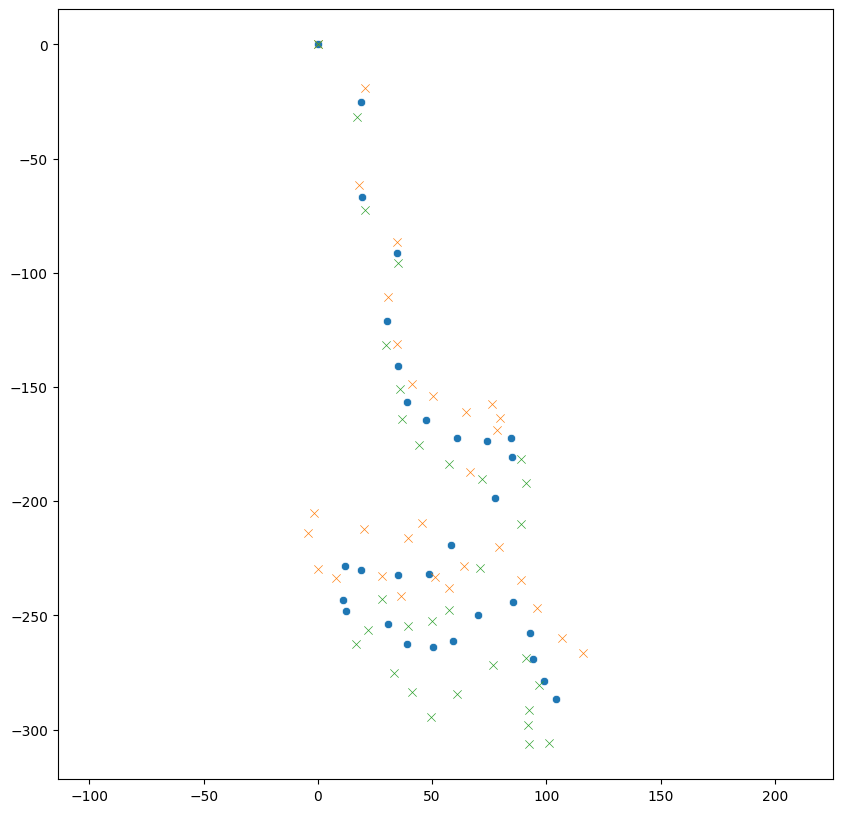

In [38]:
_, ax = plt.subplots(figsize=(10,10))
plt.axis('equal')
x, y = mean_recoil(rc)
sns.scatterplot(ax=ax, x=x, y=y)

# sns.scatterplot(ax=ax, x=tc['x'], y=tc['y'])
for r in rc:
    sns.scatterplot(ax=ax, x=r['x'], y=r['y'], marker='x')
# x, y = mean_recoil(rc[:7])
# sns.scatterplot(ax=ax, x=x, y=y)
n = len(rc[0]['x'])
r = rpm(rc[0]['weapon'])
t = [int(i * 60.0 * 1000 / r) for i in range(n)]
# print(json.dumps({'time_points': t}))

s = json.dumps({
    'x': x,
    'y': y,
    'time_points': t,
    })
print(s.replace('], ','],\n')[1:-1] + ',')
print(n, len(x), len(y), len(t))

In [36]:
err = [0] * len(rc)
maxerr = [0] * len(rc)
minerr = [100000000] * len(rc)
n = 55
tx, ty = mean_recoil(rc)
for i in range(200):
    t = np.random.permutation(rc)
    for j in range(len(t)):
        x, y = mean_recoil(t[:j+1])
        d = diff(x, tx) + diff(y, ty)
        err[j] += d
        minerr[j] = min(minerr[j], d)
        maxerr[j] = max(maxerr[j], d)

bd = 0
bi = 0
for i, r in enumerate(rc):
    d = diff(r['x'][:n], tx) + diff(r['y'][:n], ty)
    if d > bd:
        bd = d
        bi = i
print('bad', bi, rc[bi]['comment'])
sns.lineplot(x=range(len(rc)), y=[x for x in err])
d = err[-2] / err[0]
d, d < 0.01, [rc_score(r, {'x': tx, 'y': ty}) for r in rc]

IndexError: list index out of range